# 导入工具包

In [1]:
# opencv-python
import cv2

import numpy as np

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型、输入图像、获取预测结果、可视化

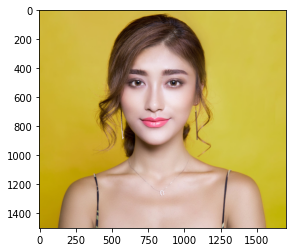

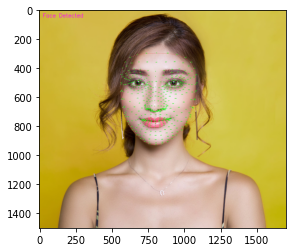

True

In [3]:
# mp_face_mesh = mp.solutions.face_mesh
# model = mp_face_mesh.FaceMesh(
#                         static_image_mode=True,      # 是静态图片还是连续视频帧
#                         max_num_faces=2,              # 最多检测几张脸
#                         min_detection_confidence=0.5, # 置信度阈值
#                         min_tracking_confidence=0.5,  # 追踪阈值
#                     )
# # 导入可视化绘图函数
# mp_drawing = mp.solutions.drawing_utils 
# drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=[66,77,229])
# 导入三维人脸关键点检测模型
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(   
        static_image_mode=True,      # 是静态图片还是连续视频帧
        refine_landmarks=True,       # 使用注意力机制Attention Mesh Model，对嘴唇、眼睛、瞳孔周围的关键点精细定位
        max_num_faces=5,              # 最多检测几张脸
        min_detection_confidence=0.5, # 置信度阈值
        min_tracking_confidence=0.5,  # 追踪阈值
)

# 导入可视化绘图函数
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=[66,77,229])

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person3.jpeg')

look_img(img)

# 获取图像宽高
h,w = img.shape[0], img.shape[1]
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

# 文字大小
scaler = 1

if results.multi_face_landmarks: # 如果检测出人脸

        for face_landmarks in results.multi_face_landmarks: # 遍历每一张脸
            mp_drawing.draw_landmarks(
                  image=img,
                  landmark_list=face_landmarks,
                  connections=mp_face_mesh.FACEMESH_CONTOURS,
                  landmark_drawing_spec=drawing_spec,
                  connection_drawing_spec=drawing_spec)
            
            for idx, coord in enumerate(face_landmarks.landmark): # 遍历每一个关键点
                cx = int(coord.x * w)
                cy = int(coord.y * h)
                # 图片，添加的文字，左上角坐标，字体，字体大小，颜色，字体粗细
                img = cv2.putText(img, 'Face Detected', (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
                img = cv2.putText(img, str(idx), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.2*scaler, (0, 255, 0), 1)
else:
    img = cv2.putText(img, 'No Face Detected', (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

look_img(img)

cv2.imwrite("face_id.jpg",img)

# 可视化参数

In [4]:
radius = 12 # 关键点圆的半径
lw = 2 # 直线的线宽

# 脸轮廓四周边缘点

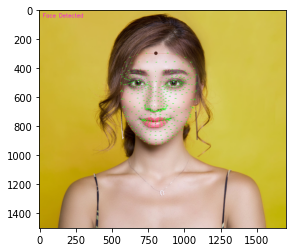

In [5]:
# 脸上边缘：10
FT = results.multi_face_landmarks[0].landmark[10]; FT_X, FT_Y = int(FT.x * w), int(FT.y * h); FT_Color = (31,41,81)
img = cv2.circle(img,(FT_X, FT_Y), radius, FT_Color, -1)
look_img(img)

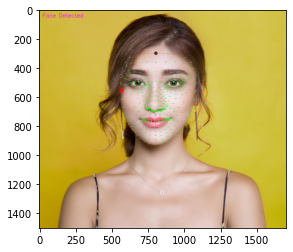

In [6]:
# 脸轮廓最左点：234
FL = results.multi_face_landmarks[0].landmark[234]; FL_X, FL_Y = int(FL.x * w), int(FL.y * h); FL_Color = (0,0,255)
img = cv2.circle(img,(FL_X, FL_Y), radius, FL_Color, -1)
look_img(img)

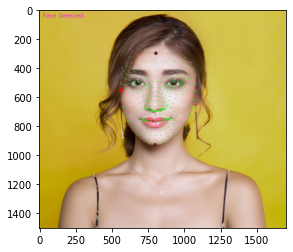

In [7]:
# 脸轮廓最下边缘：152
FB = results.multi_face_landmarks[0].landmark[152]; FB_X, FB_Y = int(FB.x * w), int(FB.y * h); FB_Color = (31,41,81)
img = cv2.circle(img,(FB_X, FB_Y), radius, FB_Color, -1)
look_img(img)

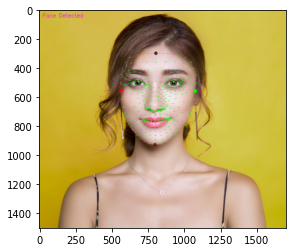

In [8]:
# 脸轮廓最右点：454
FR = results.multi_face_landmarks[0].landmark[454]; FR_X, FR_Y = int(FR.x * w), int(FR.y * h); FR_Color = (0,255,0)
img = cv2.circle(img,(FR_X, FR_Y), radius, FR_Color, -1)
look_img(img)

# 三庭

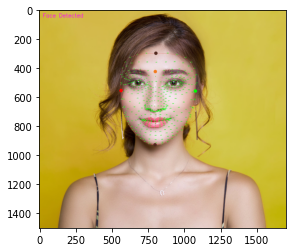

In [9]:
# 眉心：9
MX = results.multi_face_landmarks[0].landmark[9]; MX_X, MX_Y = int(MX.x * w), int(MX.y * h); MX_Color = (29,123,243)
img = cv2.circle(img,(MX_X, MX_Y), radius, MX_Color, -1)
look_img(img)

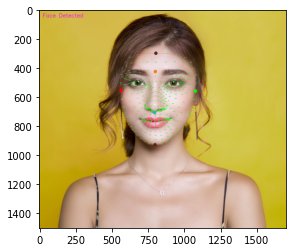

In [10]:
# 鼻翼下缘：2
NB = results.multi_face_landmarks[0].landmark[2]; NB_X, NB_Y = int(NB.x * w), int(NB.y * h); NB_Color = (180,187,28)
img = cv2.circle(img,(NB_X, NB_Y), radius, NB_Color, -1)
look_img(img)

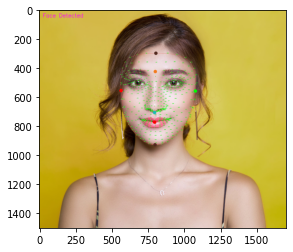

In [11]:
# 嘴唇中心：13
LC = results.multi_face_landmarks[0].landmark[13]; LC_X, LC_Y = int(LC.x * w), int(LC.y * h); LC_Color = (0,0,255)
img = cv2.circle(img,(LC_X, LC_Y), radius, LC_Color, -1)
look_img(img)

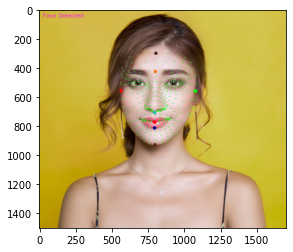

In [12]:
# 嘴唇下缘：17
LB = results.multi_face_landmarks[0].landmark[17]; LB_X, LB_Y = int(LB.x * w), int(LB.y * h); LB_Color = (139,0,0)
img = cv2.circle(img,(LB_X, LB_Y), radius, LB_Color, -1)
look_img(img)

In [13]:
# 从上到下六个点
Six_Y = np.array([FT_Y, MX_Y, NB_Y, LC_Y, LB_Y, FB_Y])

In [14]:
Six_Y

array([297, 423, 705, 771, 811, 927])

In [15]:
# 从最上到最下的距离
Top_Down = FB_Y - FT_Y

In [16]:
Top_Down

630

In [17]:
# 从上到下六个点间隔的五个距离，并归一化
Three_Section_Distance = 100 * np.diff(Six_Y) / Top_Down

In [18]:
Three_Section_Distance

array([20.        , 44.76190476, 10.47619048,  6.34920635, 18.41269841])

In [19]:
# 三庭的后两庭是否接近，越小越好
Three_Section_Metric_A = np.abs(Three_Section_Distance[1] - sum(Three_Section_Distance[2:]))

In [20]:
Three_Section_Metric_A

9.523809523809518

In [21]:
# 鼻下到唇心距离 占 第三庭的三分之一
Three_Section_Metric_B = np.abs(Three_Section_Distance[2] - sum(Three_Section_Distance[2:])/3)

# 唇心到下巴尖距离 占 第三庭的二分之一
Three_Section_Metric_C = np.abs(sum(Three_Section_Distance[3:]) - sum(Three_Section_Distance[2:])/2)

In [22]:
Three_Section_Metric_B

1.2698412698412707

In [23]:
Three_Section_Metric_C

7.142857142857139

# 五眼

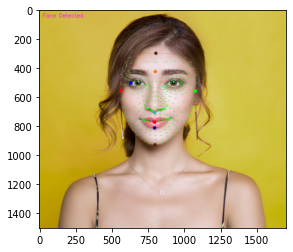

In [24]:
# 左边眼睛左眼角
ELL = results.multi_face_landmarks[0].landmark[33]; ELL_X, ELL_Y = int(ELL.x * w), int(ELL.y * h); ELL_Color = (255,0,0)
img = cv2.circle(img,(ELL_X, ELL_Y), radius, ELL_Color, -1)
look_img(img)

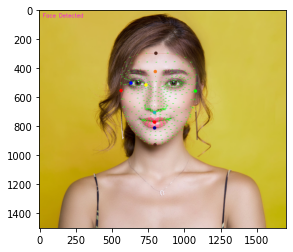

In [25]:
# 左边眼睛右眼角
ELR = results.multi_face_landmarks[0].landmark[133]; ELR_X, ELR_Y = int(ELR.x * w), int(ELR.y * h); ELR_Color = (0,255,255)
img = cv2.circle(img,(ELR_X, ELR_Y), radius, ELR_Color, -1)
look_img(img)

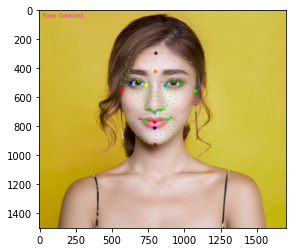

In [26]:
# 右边眼睛左眼角
ERL = results.multi_face_landmarks[0].landmark[362]; ERL_X, ERL_Y = int(ERL.x * w), int(ERL.y * h); ERL_Color = (223,155,6)
img = cv2.circle(img,(ERL_X, ERL_Y), radius, ERL_Color, -1)
look_img(img)

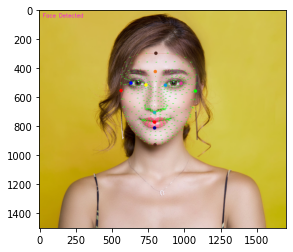

In [27]:
# 右边眼睛右眼角
ERR = results.multi_face_landmarks[0].landmark[263]; ERR_X, ERR_Y = int(ERR.x * w), int(ERR.y * h); ERR_Color = (151,57,224)
img = cv2.circle(img,(ERR_X, ERR_Y), radius, ERR_Color, -1)
look_img(img)

In [28]:
# 从左往右六个点的横坐标
Six_X = np.array([FL_X, ELL_X, ELR_X, ERL_X, ERR_X, FR_X])

# 从最左到最右的距离
Left_Right = FR_X - FL_X

# 从左往右六个点间隔的五个距离，并归一化
Five_Distance = 100 * np.diff(Six_X) / Left_Right

In [29]:
Five_Distance

array([13.28125  , 20.3125   , 26.171875 , 20.8984375, 19.3359375])

In [30]:
# 两眼宽度的平均值
Eye_Width_Mean = np.mean([Five_Distance[1], Five_Distance[3]])

In [31]:
Eye_Width_Mean

20.60546875

In [32]:
# 五个距离 与 两眼宽度均值 的差
Five_Eye_Diff = Five_Distance - Eye_Width_Mean

In [33]:
Five_Eye_Diff

array([-7.32421875, -0.29296875,  5.56640625,  0.29296875, -1.26953125])

In [34]:
# 求L2范数，作为颜值的“五眼”评价指标
Five_Eye_Metrics = np.linalg.norm(Five_Eye_Diff)

In [35]:
Five_Eye_Metrics

9.295828624150205

# 达芬奇

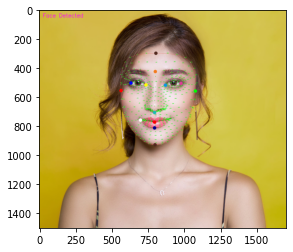

In [36]:
# 嘴唇左角：61
LL = results.multi_face_landmarks[0].landmark[61]; LL_X, LL_Y = int(LL.x * w), int(LL.y * h); LL_Color = (255,255,255)
img = cv2.circle(img,(LL_X, LL_Y), radius, LL_Color, -1)
look_img(img)

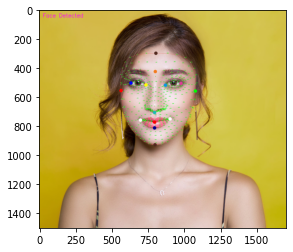

In [37]:
# 嘴唇右角：291
LR = results.multi_face_landmarks[0].landmark[291]; LR_X, LR_Y = int(LR.x * w), int(LR.y * h); LR_Color = (255,255,255)
img = cv2.circle(img,(LR_X, LR_Y), radius, LR_Color, -1)
look_img(img)

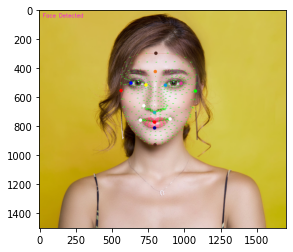

In [38]:
# 鼻子左缘：129
NL = results.multi_face_landmarks[0].landmark[129]; NL_X, NL_Y = int(NL.x * w), int(NL.y * h); NL_Color = (255,255,255)
img = cv2.circle(img,(NL_X, NL_Y), radius, NL_Color, -1)
look_img(img)

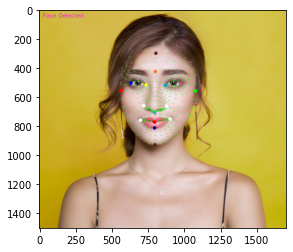

In [39]:
# 鼻子右缘：358
NR = results.multi_face_landmarks[0].landmark[358]; NR_X, NR_Y = int(NR.x * w), int(NR.y * h); NR_Color = (255,255,255)
img = cv2.circle(img,(NR_X, NR_Y), radius, NR_Color, -1)
look_img(img)

In [40]:
# 嘴宽为鼻宽的1.5-1.6倍
Da_Vinci = (LR.x - LL.x) / (NR.x - NL.x)

In [41]:
Da_Vinci

1.298047604583379

# 眉毛

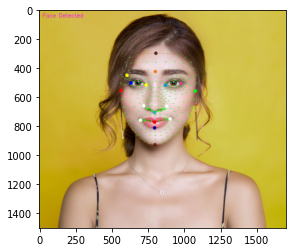

In [42]:
# 左眉毛左眉角：46
EBLL = results.multi_face_landmarks[0].landmark[46]; EBLL_X, EBLL_Y = int(EBLL.x * w), int(EBLL.y * h); EBLL_Color = (0,255,255)
img = cv2.circle(img,(EBLL_X, EBLL_Y), radius, EBLL_Color, -1)
look_img(img)

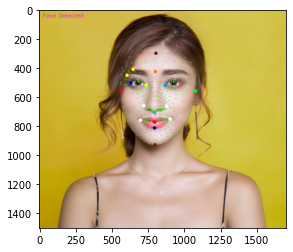

In [43]:
# 左眉毛眉峰：105
EBLT = results.multi_face_landmarks[0].landmark[105]; EBLT_X, EBLT_Y = int(EBLT.x * w), int(EBLT.y * h); EBLT_Color = (0,255,255)
img = cv2.circle(img,(EBLT_X, EBLT_Y), radius, EBLT_Color, -1)
look_img(img)

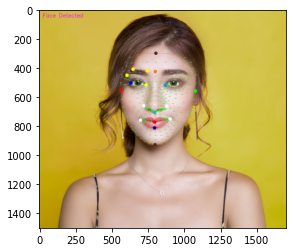

In [44]:
# 左眉毛右角：107
EBLR = results.multi_face_landmarks[0].landmark[107]; EBLR_X, EBLR_Y = int(EBLR.x * w), int(EBLR.y * h); EBLR_Color = (0,255,255)
img = cv2.circle(img,(EBLR_X, EBLR_Y), radius, EBLR_Color, -1)
look_img(img)

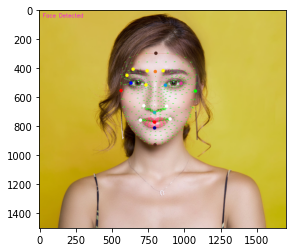

In [45]:
# 右眉毛左角：336
EBRL = results.multi_face_landmarks[0].landmark[336]; EBRL_X, EBRL_Y = int(EBRL.x * w), int(EBRL.y * h); EBRL_Color = (0,255,255)
img = cv2.circle(img,(EBRL_X, EBRL_Y), radius, EBRL_Color, -1)
look_img(img)

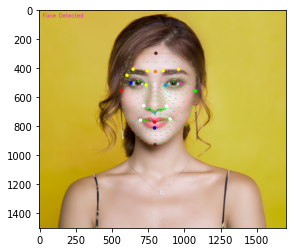

In [46]:
# 右眉毛眉峰：334
EBRT = results.multi_face_landmarks[0].landmark[334]; EBRT_X, EBRT_Y = int(EBRT.x * w), int(EBRT.y * h); EBRT_Color = (0,255,255)
img = cv2.circle(img,(EBRT_X, EBRT_Y), radius, EBRT_Color, -1)
look_img(img)

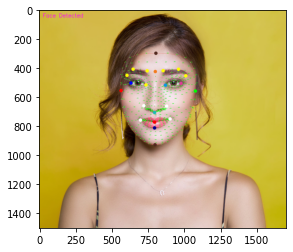

In [47]:
# 右眉毛右眉角：276
EBRR = results.multi_face_landmarks[0].landmark[276]; EBRR_X, EBRR_Y = int(EBRR.x * w), int(EBRR.y * h); EBRR_Color = (0,255,255)
img = cv2.circle(img,(EBRR_X, EBRR_Y), radius, EBRR_Color, -1)
look_img(img)

In [48]:
# 内侧眉头在内眦（内测眼角）正上方-左侧
# 越接近0越好
EB_Metric_A = (EBLR_X - ELR_X) / Left_Right

In [49]:
EB_Metric_A

0.015625

In [50]:
# 内侧眉头在内眦（内测眼角）正上方-右侧
# 越接近0越好
EB_Metric_B = (EBRL_X - ERL_X) / Left_Right

In [51]:
EB_Metric_B

-0.03125

In [51]:
# 眉峰在外眦（外测眼角）正上方-左侧
# 越接近0越好
EB_Metric_C = (EBLT_X - ELL_X) / Left_Right

In [52]:
EB_Metric_C

0.029296875

In [53]:
# 眉峰在外眦（外测眼角）正上方-右侧
# 越接近0越好
EB_Metric_D = (EBRT_X - ERR_X) / Left_Right

In [55]:
EB_Metric_D

-0.033203125

In [54]:
# 外侧眉峰、外侧眼角、鼻翼 应 处于同一条直线上-左侧
# 计算这三点构成的三角形面积，越小越好
EB_Metric_E = 0.5 * np.linalg.det([[EBLL_X,EBLL_Y,1],[ELL_X,ELL_Y,1],[NL_X,NL_Y,1]]) / (Left_Right)**2

In [55]:
EB_Metric_E

-0.0009632110595703146

In [56]:
# 外侧眉峰、外侧眼角、鼻翼 应 处于同一条直线上-右侧
# 计算这三点构成的三角形面积，越小越好
EB_Metric_F = 0.5 * np.linalg.det([[EBRR_X,EBRR_Y,1],[ERR_X,ERR_Y,1],[NR_X,NR_Y,1]]) / (Left_Right)**2

In [57]:
EB_Metric_F

-6.294250488282723e-05

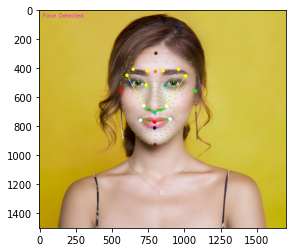

In [58]:
# 可视化
# 外侧眉峰、外侧眼角、鼻翼 应 处于同一条直线上-左侧
cv2.line(img,(EBLL_X, EBLL_Y),(ELL_X, ELL_Y), EBLL_Color, lw)
cv2.line(img,(ELL_X, ELL_Y),(NL_X, NL_Y), EBLL_Color, lw)
cv2.line(img,(EBLL_X, EBLL_Y),(NL_X, NL_Y), EBLL_Color, lw)

# 外侧眉峰、外侧眼角、鼻翼 应 处于同一条直线上-右侧
cv2.line(img,(EBRR_X, EBRR_Y),(ERR_X, ERR_Y), EBLL_Color, lw)
cv2.line(img,(ERR_X, ERR_Y),(NR_X, NR_Y), EBLL_Color, lw)
cv2.line(img,(EBRR_X, EBRR_Y),(NR_X, NR_Y), EBLL_Color, lw)
look_img(img)

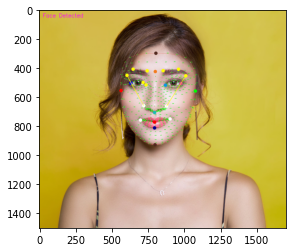

In [59]:
# 左内眼角上点：157
ELRT = results.multi_face_landmarks[0].landmark[157]; ELRT_X, ELRT_Y = int(ELRT.x * w), int(ELRT.y * h); ELRT_Color = (0,255,255)
img = cv2.circle(img,(ELRT_X, ELRT_Y), radius, ELRT_Color, -1)
look_img(img)

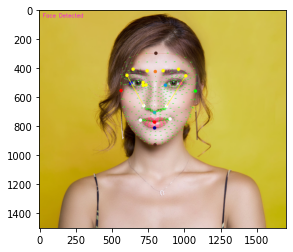

In [60]:
# 左内眼角下点：154
ELRB = results.multi_face_landmarks[0].landmark[154]; ELRB_X, ELRB_Y = int(ELRB.x * w), int(ELRB.y * h); ELRB_Color = (0,255,255)
img = cv2.circle(img,(ELRB_X, ELRB_Y), radius, ELRB_Color, -1)
look_img(img)

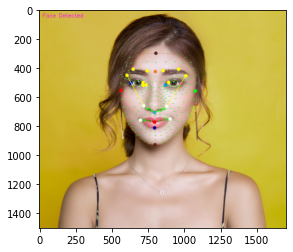

In [61]:
# 右内眼角上点：384
ERLT = results.multi_face_landmarks[0].landmark[384]; ERLT_X, ERLT_Y = int(ERLT.x * w), int(ERLT.y * h); ERLT_Color = (0,255,255)
img = cv2.circle(img,(ERLT_X, ERLT_Y), radius, ERLT_Color, -1)
look_img(img)

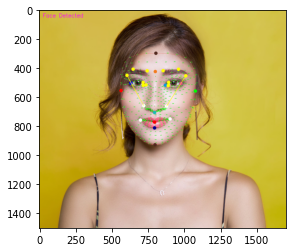

In [62]:
# 右内眼角下点：381
ERRB = results.multi_face_landmarks[0].landmark[381]; ERRB_X, ERRB_Y = int(ERRB.x * w), int(ERRB.y * h); ERRB_Color = (0,255,255)
img = cv2.circle(img,(ERRB_X, ERRB_Y), radius, ERRB_Color, -1)
look_img(img)

In [63]:
# 内眼角开合度数-左侧 
# 48度至50度为宜
vector_a = np.array([ELRT_X-ELR_X,ELRT_Y-ELR_Y])
vector_b = np.array([ELRB_X-ELR_X,ELRB_Y-ELR_Y])
cos = vector_a.dot(vector_b)/(np.linalg.norm(vector_a) * np.linalg.norm(vector_b))
EB_Metric_G = np.degrees(np.arccos(cos))

In [64]:
EB_Metric_G

49.33716318799375

In [65]:
# 内眼角开合度数-右侧
# 48度至50度为宜
vector_a = np.array([ERLT_X-ERL_X,ERLT_Y-ERL_Y])
vector_b = np.array([ERRB_X-ERL_X,ERRB_Y-ERL_Y])
cos = vector_a.dot(vector_b)/(np.linalg.norm(vector_a) * np.linalg.norm(vector_b))
EB_Metric_H = np.degrees(np.arccos(cos))

In [66]:
EB_Metric_H

51.24631562099013

# 可视化

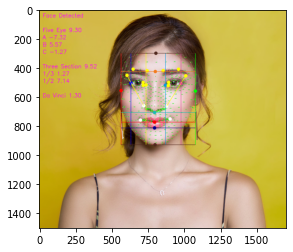

In [67]:
# 画五眼的竖线
cv2.line(img,(FL_X, FT_Y),(FL_X, FB_Y), FL_Color, lw)
cv2.line(img,(ELL_X, FT_Y),(ELL_X, FB_Y), ELL_Color, lw)
cv2.line(img,(ELR_X, FT_Y),(ELR_X, FB_Y), ELR_Color, lw)
cv2.line(img,(ERL_X, FT_Y),(ERL_X, FB_Y), ERL_Color, lw)
cv2.line(img,(ERR_X, FT_Y),(ERR_X, FB_Y), ERR_Color, lw)
cv2.line(img,(FR_X, FT_Y),(FR_X, FB_Y), FR_Color, lw)

# 画脸上下边缘的横线
cv2.line(img,(FL_X, FT_Y),(FR_X, FT_Y), FT_Color, lw)
cv2.line(img,(FL_X, FB_Y),(FR_X, FB_Y), FB_Color, lw)

# 画三庭的横线
cv2.line(img,(FL_X, MX_Y),(FR_X, MX_Y), MX_Color, lw)
cv2.line(img,(FL_X, NB_Y),(FR_X, NB_Y), NB_Color, lw)
cv2.line(img,(FL_X, LC_Y),(FR_X, LC_Y), LC_Color, lw)
cv2.line(img,(FL_X, LB_Y),(FR_X, LB_Y), LB_Color, lw)

scaler = 1
img = cv2.putText(img, 'Five Eye {:.2f}'.format(Five_Eye_Metrics), (25 * scaler, 150 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, 'A {:.2f}'.format(Five_Eye_Diff[0]), (25 * scaler, 200 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, 'B {:.2f}'.format(Five_Eye_Diff[2]), (25 * scaler, 250 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, 'C {:.2f}'.format(Five_Eye_Diff[4]), (25 * scaler, 300 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

img = cv2.putText(img, 'Three Section {:.2f}'.format(Three_Section_Metric_A), (25 * scaler, 400 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, '1/3 {:.2f}'.format(Three_Section_Metric_B), (25 * scaler, 450 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, '1/2 {:.2f}'.format(Three_Section_Metric_C), (25 * scaler, 500 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

img = cv2.putText(img, 'Da Vinci {:.2f}'.format(Da_Vinci), (25 * scaler, 600 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

look_img(img)

In [68]:
cv2.imwrite("metrics.jpg",img)

True